In [2]:
# 실시간 고속도로 정체상황
# http://data.ex.co.kr/openapi/basicinfo/openApiInfoM?apiId=0406&serviceType=OPENAPI&keyWord=%EC%8B%A4%EC%8B%9C%EA%B0%84&searchDayFrom=2014.12.01&searchDayTo=2022.12.16&CATEGORY=&GROUP_TR=
import pandas as pd
import urllib.request
import datetime
import json
import time

In [ ]:
my_key='http://data.ex.co.kr/openapi/basicinfo/openApiInfoM?apiId=0406&serviceType=OPENAPI&keyWord=%EC%8B%A4%EC%8B%9C%EA%B0%84&searchDayFrom=2014.12.01&searchDayTo=2022.12.16&CATEGORY=&GROUP_TR='

In [16]:
# url ="http://data.ex.co.kr/openapi/odtraffic/trafficAmountByCongest?key=test&type=json"
url ="http://data.ex.co.kr/openapi/odtraffic/trafficAmountByCongest?key=5428338684&type=json"

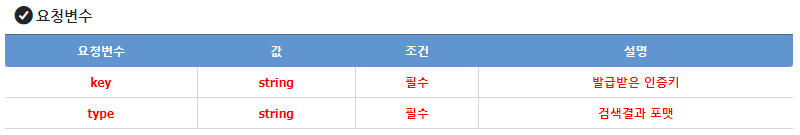

In [17]:
def get_request_url(url):                 
    req = urllib.request.Request(url)     

    try:
        response = urllib.request.urlopen(req)
        if response.getcode() == 200:
            print("[%s] Url Request Success" % datetime.datetime.now())
            return response.read().decode('utf-8')
    except Exception as e:
        print(e)
        print("[%s] Error for URL : %s" % (datetime.datetime.now(), url))
        return None
response_data = get_request_url(url)
if (response_data == None):
    print('No response')
else:
    raw_json_data = json.loads(response_data)

[2022-12-24 06:02:56.735786] Url Request Success


In [18]:
raw_json_data

{'count': 6,
 'list': [{'routeName': '경부선',
   'routeNo': '0010',
   'trafficAmout': '9',
   'conzoneId': '0010CZS320',
   'conzoneName': '청주JC-남청주IC',
   'stdDate': '20221224',
   'stdHour': '0602',
   'vdsId': '0010VDS23000',
   'speed': '15',
   'shareRatio': '61',
   'timeAvg': '376',
   'grade': '3',
   'updownTypeCode': 'S'},
  {'routeName': '중부선',
   'routeNo': '0352',
   'trafficAmout': '8',
   'conzoneId': '0352CZE400',
   'conzoneName': '경기광주IC-산곡JC',
   'stdDate': '20221224',
   'stdHour': '0602',
   'vdsId': '0352VDE09600',
   'speed': '28',
   'shareRatio': '7',
   'timeAvg': '79',
   'grade': '3',
   'updownTypeCode': 'E'},
  {'routeName': '중부선',
   'routeNo': '0352',
   'trafficAmout': '8',
   'conzoneId': '0352CZE400',
   'conzoneName': '경기광주IC-산곡JC',
   'stdDate': '20221224',
   'stdHour': '0602',
   'vdsId': '0352VDE09650',
   'speed': '28',
   'shareRatio': '7',
   'timeAvg': '156',
   'grade': '3',
   'updownTypeCode': 'E'},
  {'routeName': '영동선',
   'routeNo': '050

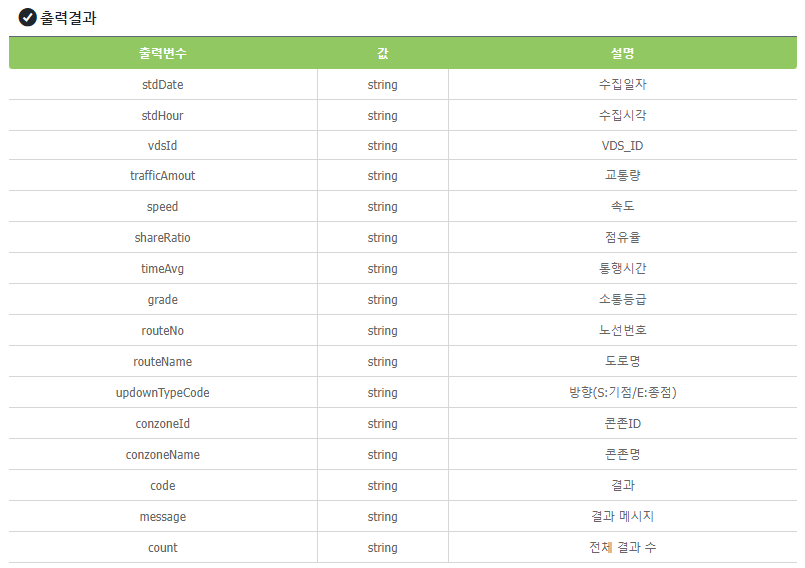

In [6]:
def get_df_info(json_data, records_root_name):
    column_list=[]
    all_data=[]
    is_first=True
    for record in json_data[records_root_name]:
        row_data_list=[]
        for key, value in record.items():
            if is_first:
                column_list.append(key)
            row_data_list.append(value)
        all_data.append(row_data_list)
        is_first=False
        
    return column_list, all_data

In [7]:
column_list, all_data = get_df_info(raw_json_data,'list')

In [8]:
column_list

['stdHour',
 'routeNo',
 'routeName',
 'updownTypeCode',
 'vdsId',
 'trafficAmout',
 'shareRatio',
 'conzoneId',
 'conzoneName',
 'stdDate',
 'speed',
 'timeAvg',
 'grade']

In [9]:
all_data[0]

['0524',
 '0500',
 '영동선',
 'S',
 '0500VDS12500',
 '2',
 '19',
 '0500CZS240',
 '둔내IC-새말IC',
 '20221224',
 '8',
 '346',
 '3']

In [11]:
df = pd.DataFrame(all_data, columns=column_list)
df

,stdHour,routeNo,routeName,updownTypeCode,vdsId,trafficAmout,shareRatio,conzoneId,conzoneName,stdDate,speed,timeAvg,grade
0,0524,0500,영동선,S,0500VDS12500,2,19,0500CZS240,둔내IC-새말IC,20221224,8,346,3
1,0524,1000,수도권제1순환선,S,1000VDS06800,91,35,1000CZS370,학의JC-평촌IC,20221224,23,265,3


## 데이터 전처리

In [ ]:
* 가장 큰 구간은 routeName이고 routeNo은 route에 대한 고유 식별 key로 보임
* 그 다음 구간은 conzoneName이고 conzonId는 conzone을 식별하는 key로 보임
* updownTypeCode는 구간의 시작/종료 지점으로 보임
* vdsId에 특별히 설명은 없고 검색결과 아래와 같음
VDS(Vehicle Detection System) : 차량검지기
도로 상에 약 1km 간격으로 설치되어 실시간으로 교통량, 점유율, 속도, 대기행렬길이, 차량길이 등의 정보를 검지하여 소통 및 돌발상황 등을 감시하는 장치로 도로 환경적 특성에 따라 설치하며 종류는 루프식, 영상식, 레이더식 등이 있다.

고속도로 노선상에 설치된 차량감지장치(VDS)에 의해 VDS지점별, 차로유형별, 교통

In [ ]:
s_column_list = ['stdDate','stdHour','routeName','conzoneName','routeNo','vdsId',]

In [17]:
df.head()

,routeName,routeNo,trafficAmout,conzoneId,conzoneName,stdDate,stdHour,vdsId,speed,shareRatio,timeAvg,grade,updownTypeCode
0,경부선,0010,69,0010CZE460,신갈JC-서울TG,20221216,1751,0010VDE30600,39,10,57,3,E
1,경부선,0010,85,0010CZE460,신갈JC-서울TG,20221216,1751,0010VDE30632,35,10,100,3,E
2,경부선,0010,30,0010CZS300,신탄진IC-회덕JC,20221216,1751,0010VDS21500,17,30,153,3,S
3,경부선,0010,74,0010CZS300,신탄진IC-회덕JC,20221216,1751,0010VDS21600,26,40,198,3,S
4,경부선,0010,92,0010CZS370,천안IC-천안JC,20221216,1751,0010VDS26100,32,23,117,3,S
